In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import itertools
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')

In [113]:
dict_dayweek = {0: "Segunda",
                1: "Terça",
                2: "Quarta",
                3: "Quinta",
                4: "Sexta",
                5: "Sabado",
                6: "Domingo"}

In [114]:
df = pd.read_csv("data/acorrencia_aeronave_final.csv")
df.replace({"dia_semana": dict_dayweek},inplace=True)
df

,codigo_aeronave,codigo_operador,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,peso_maximo_decolagem,quantidade_assentos,ano_fabricacao,...,quantidade_recomendacoes,aeronaves_envolvidas,dia,mes,ano,periodo_mes,dia_semana,periodo_semana,hora,periodo_dia
0,4,241,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,2.0,1962.0,...,0,1,14,6,2011,meio,Terça,semana,20,noite
1,40,160,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,2.0,1960.0,...,0,1,5,11,2015,inicio,Quinta,semana,19,noite
2,118,1232,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2.0,2310,6.0,1966.0,...,4,1,15,12,2010,meio,Quarta,semana,9,manha
3,130,3992,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1.0,1633,6.0,1979.0,...,1,1,4,2,2009,inicio,Quarta,semana,15,tarde
4,191,4365,AVIÃO,BOEING COMPANY,737-241,JATO,2.0,52389,117.0,1975.0,...,0,1,7,6,2008,inicio,Sabado,fds,14,tarde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,36454,3992,ULTRALEVE,NaN,NaN,NaN,NaN,400,NaN,2000.0,...,0,1,21,8,2015,fim,Sexta,semana,20,noite
2039,36455,3992,ULTRALEVE,NaN,NaN,NaN,NaN,0,NaN,2015.0,...,0,1,2,11,2015,inicio,Segunda,semana,9,manha
2040,38934,3992,AVIÃO,BEECH AIRCRAFT,B36TC,PISTÃO,1.0,1746,NaN,1997.0,...,0,1,31,12,2015,fim,Quinta,semana,14,tarde
2041,38941,3992,NaN,WZQ-OKECIE,PZL 106 KRUK,NaN,NaN,3000,NaN,NaN,...,0,1,3,2,2008,inicio,Domingo,fds,20,noite


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   codigo_aeronave           2043 non-null   int64  
 1   codigo_operador           2043 non-null   int64  
 2   equipamento               2038 non-null   object 
 3   fabricante                1933 non-null   object 
 4   modelo                    2028 non-null   object 
 5   tipo_motor                2015 non-null   object 
 6   quantidade_motores        2034 non-null   float64
 7   peso_maximo_decolagem     2043 non-null   int64  
 8   quantidade_assentos       2025 non-null   float64
 9   ano_fabricacao            2039 non-null   float64
 10  pais_registro             2043 non-null   object 
 11  categoria_aviacao         2018 non-null   object 
 12  fase_operacao             2043 non-null   object 
 13  tipo_operacao             2017 non-null   object 
 14  nivel_da

### Categorical features

In [116]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [117]:
categorical_feature = ['codigo_aeronave', 'codigo_operador', 'equipamento', 'fabricante',
       'modelo', 'tipo_motor', 'quantidade_motores',
       'quantidade_assentos', 'ano_fabricacao', 'pais_registro',
       'categoria_aviacao', 'fase_operacao', 'tipo_operacao', 'nivel_dano',
       'classificacao', 'tipo', 'localidade', 'uf',
       'pais', 'hora', 'dia', 'mes', 'ano', 'periodo_mes', 'dia_semana',
       'periodo_semana', 'periodo_dia']

Text(0.5, 1.0, 'Cramer V Correlation between Variables')

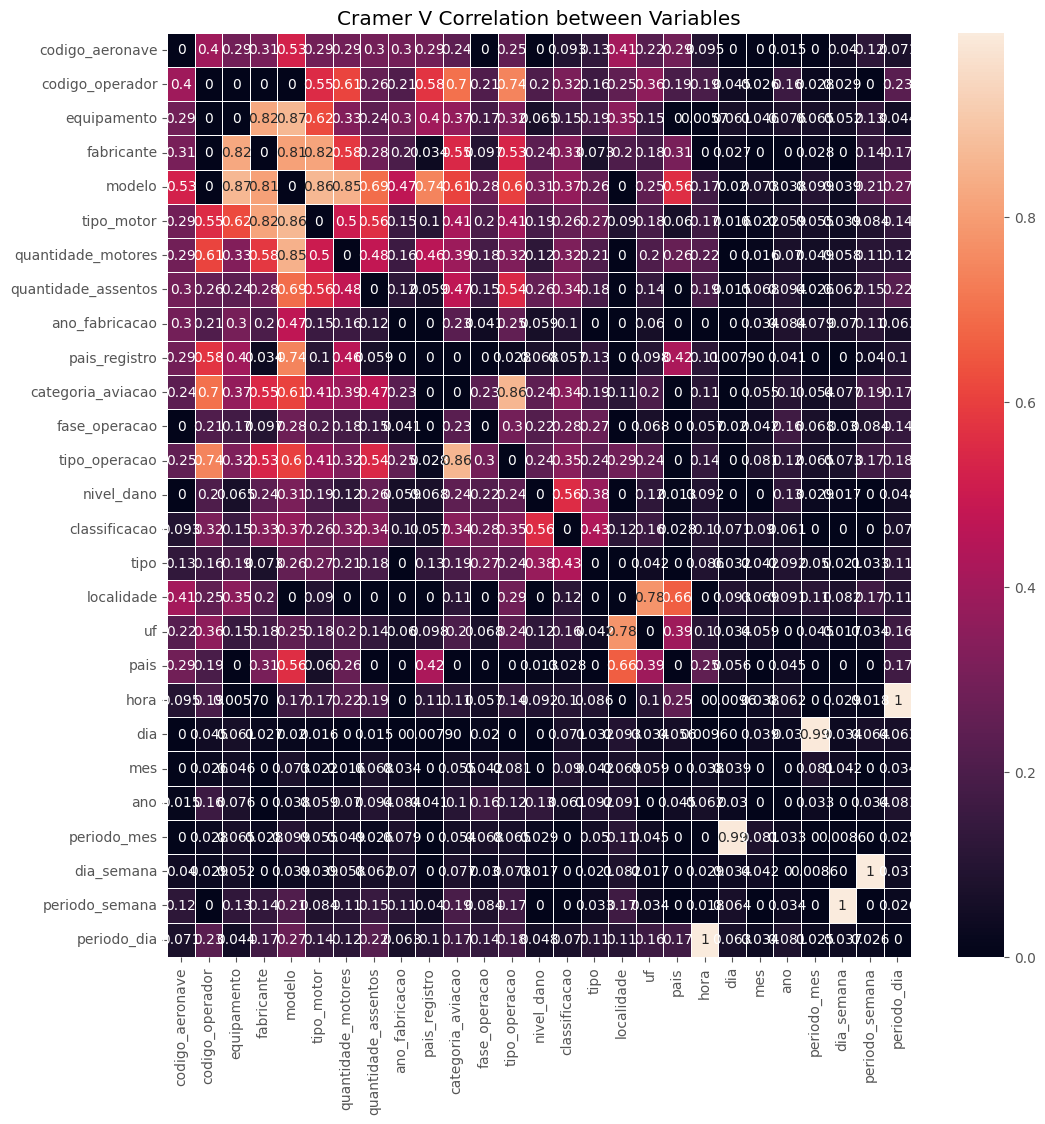

In [118]:
corrM = np.zeros((len(categorical_feature),len(categorical_feature)))

for col1, col2 in itertools.combinations(categorical_feature, 2):
    idx1, idx2 = categorical_feature.index(col1), categorical_feature.index(col2)
    corrM[idx1, idx2] = cramers_v(df[col1], df[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=categorical_feature, columns=categorical_feature)
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr, annot = True, linewidths=.5, ax=ax); ax.set_title("Cramer V Correlation between Variables")

/home/tgopedrosa/projetos/ocorrencia-aviacao/venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


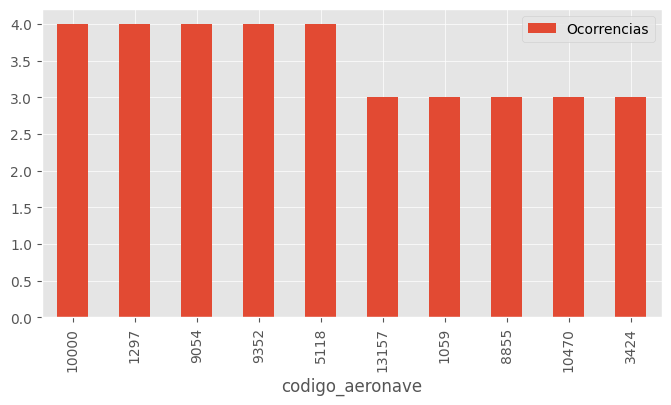

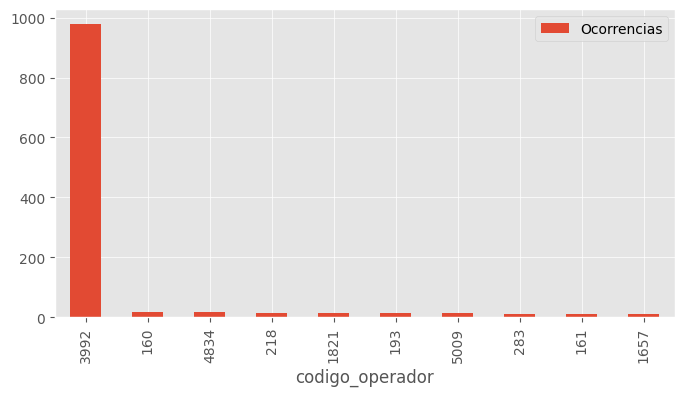

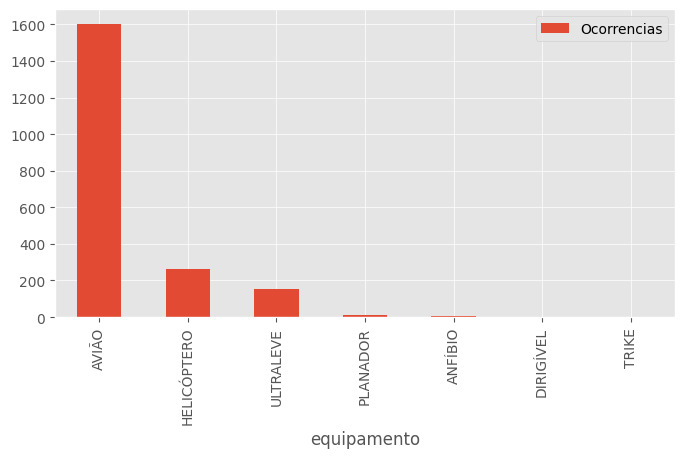

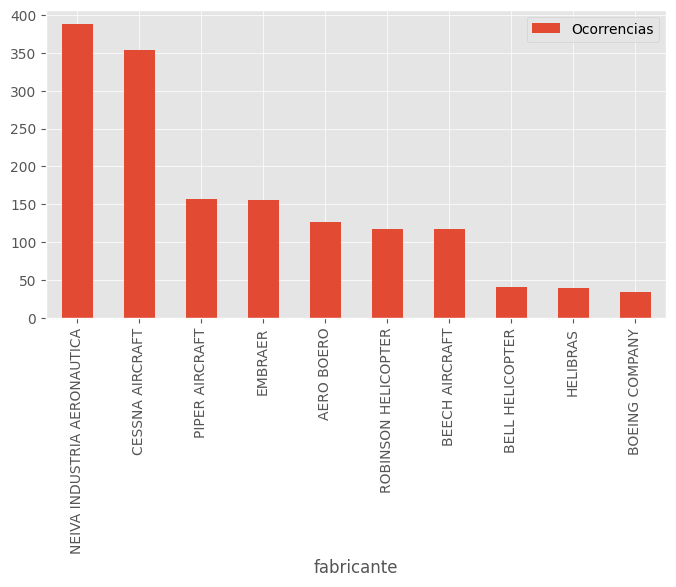

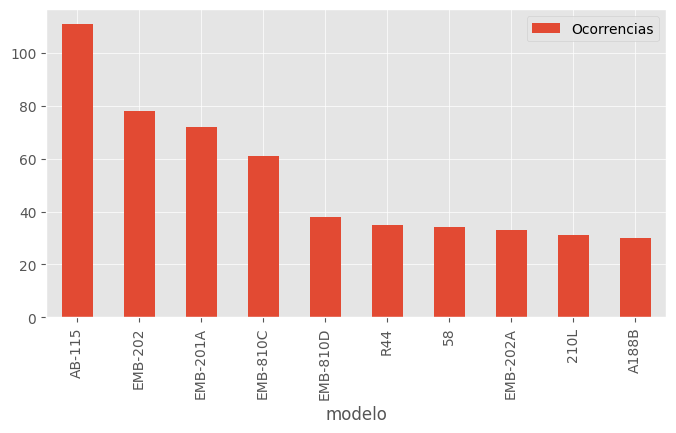

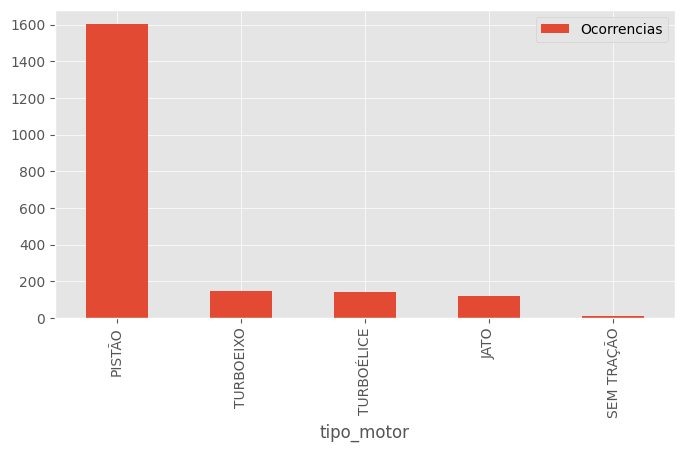

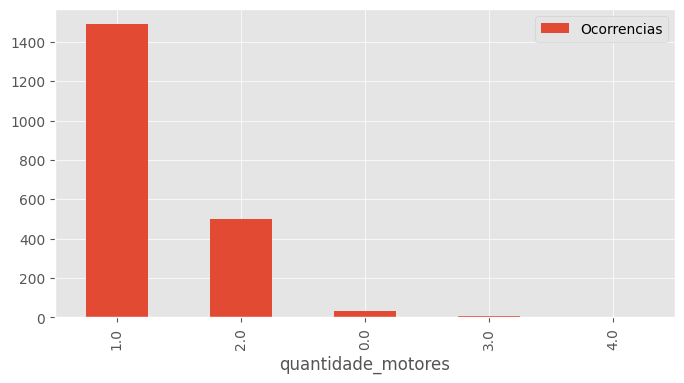

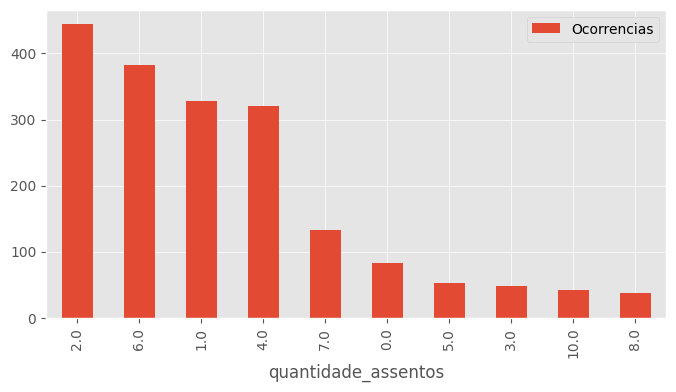

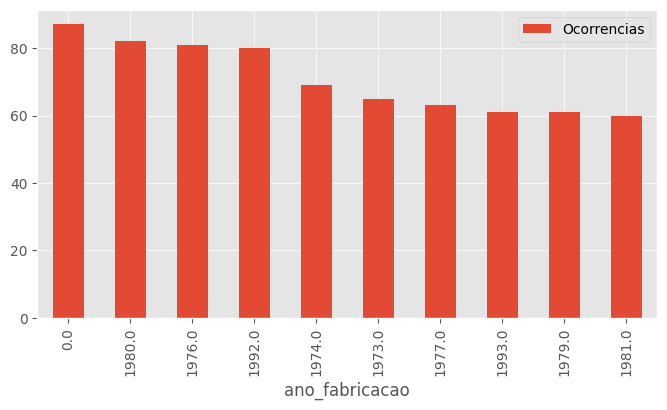

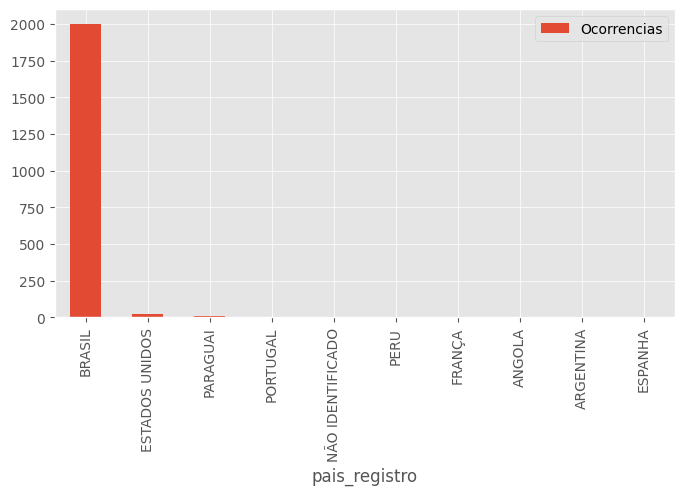

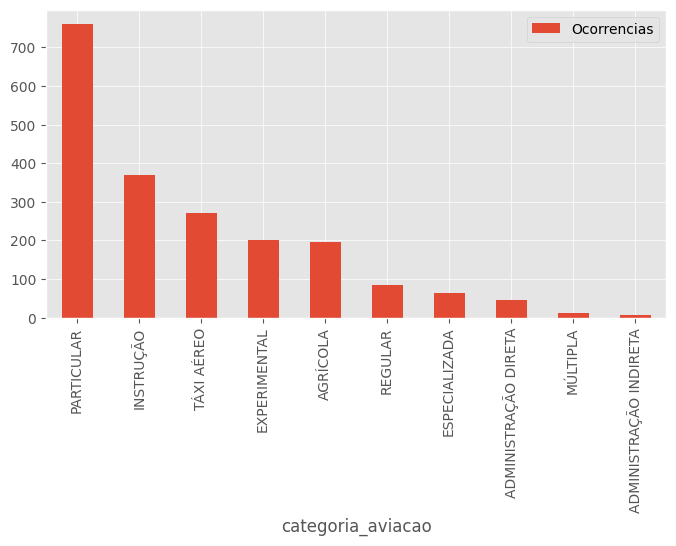

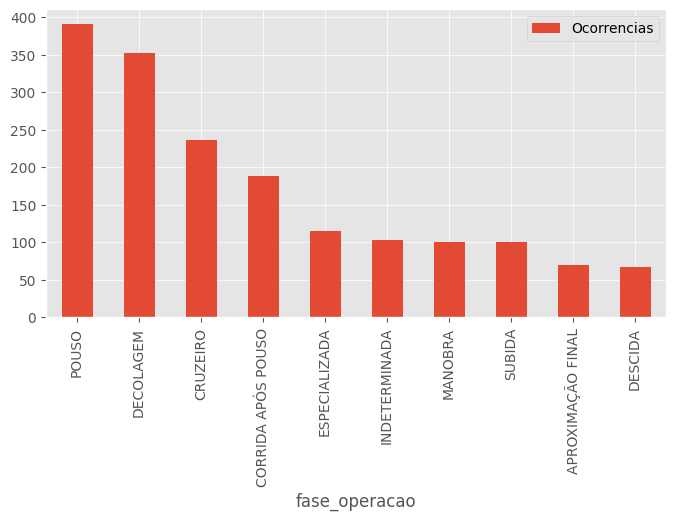

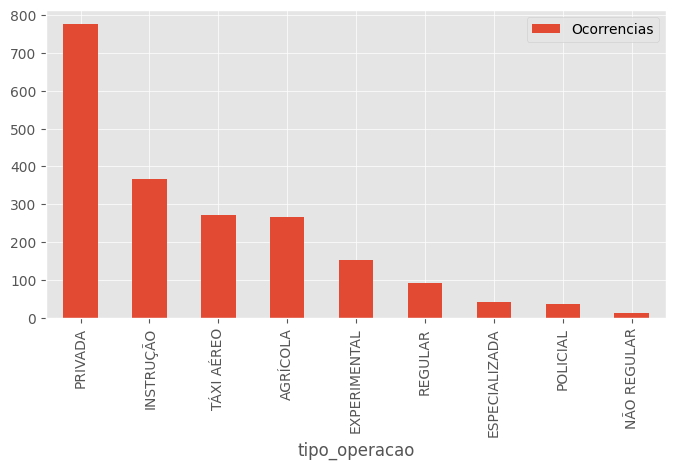

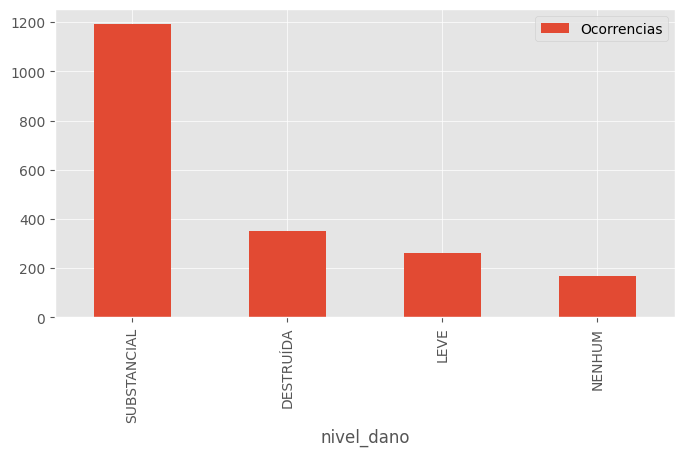

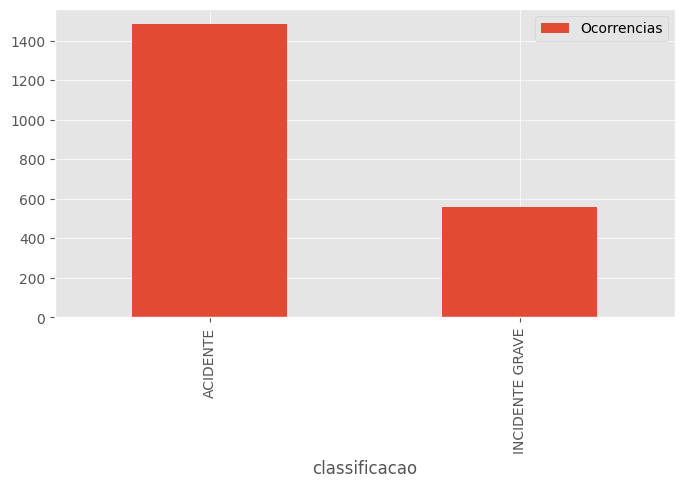

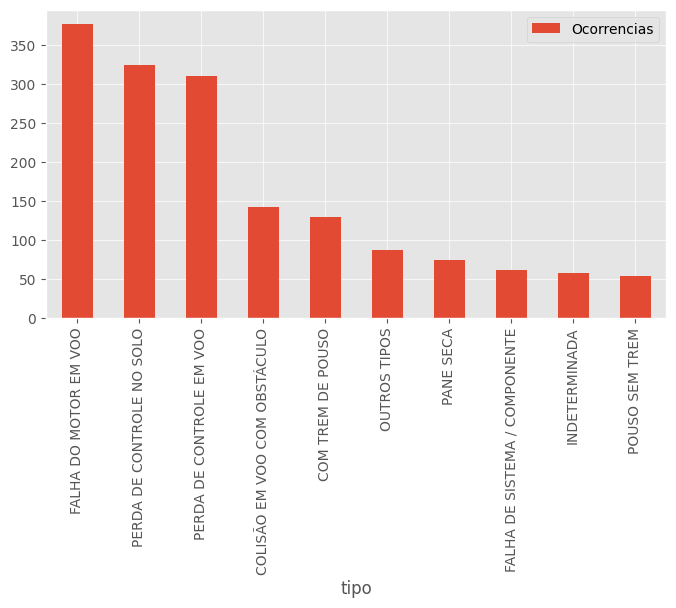

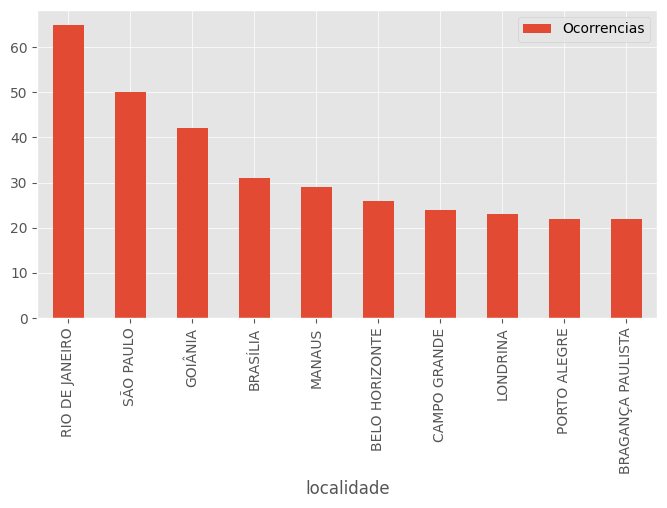

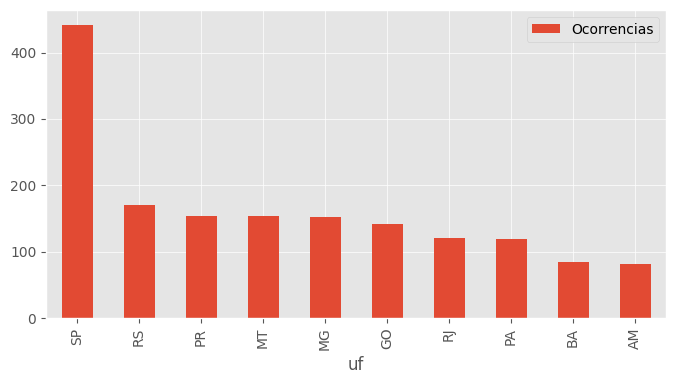

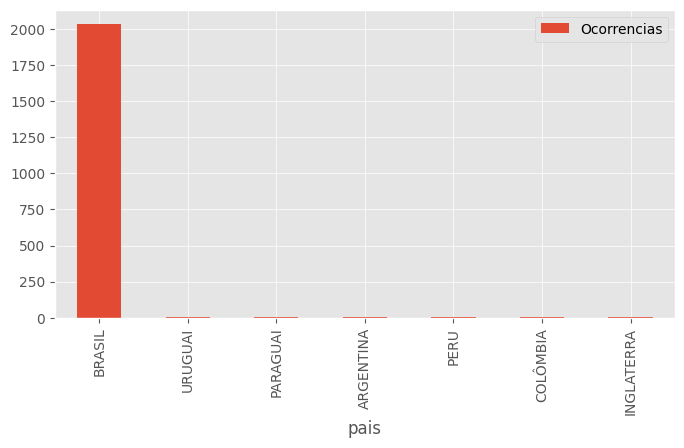

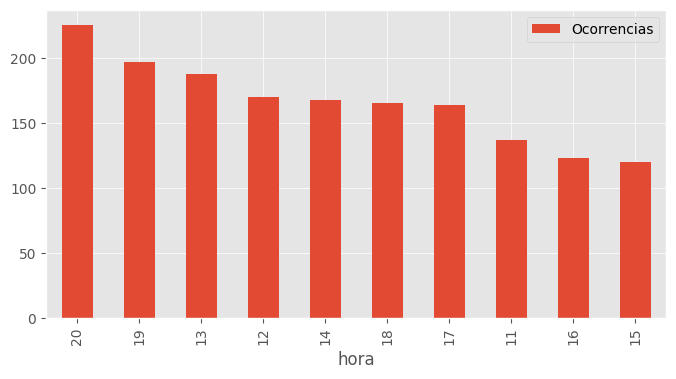

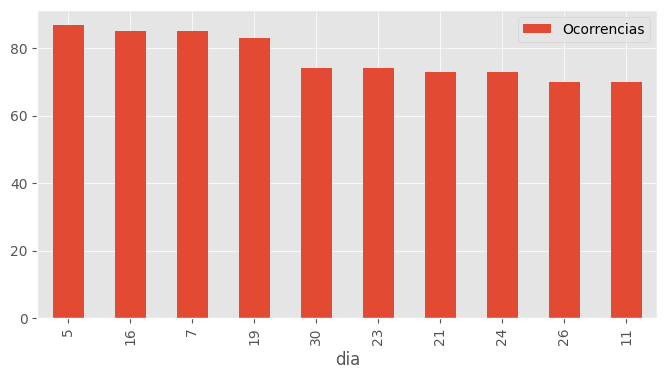

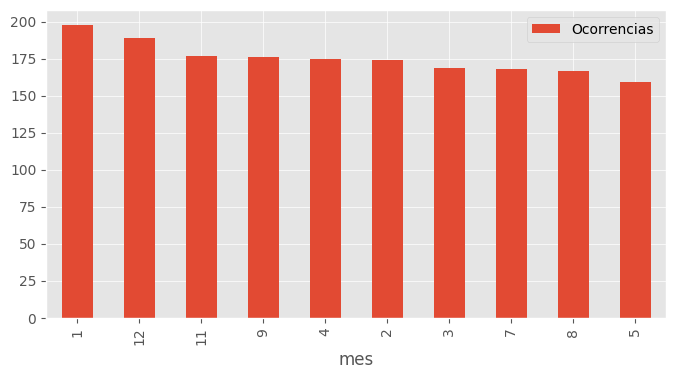

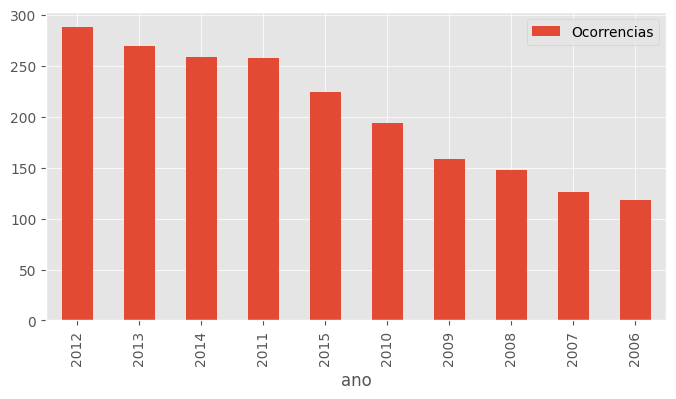

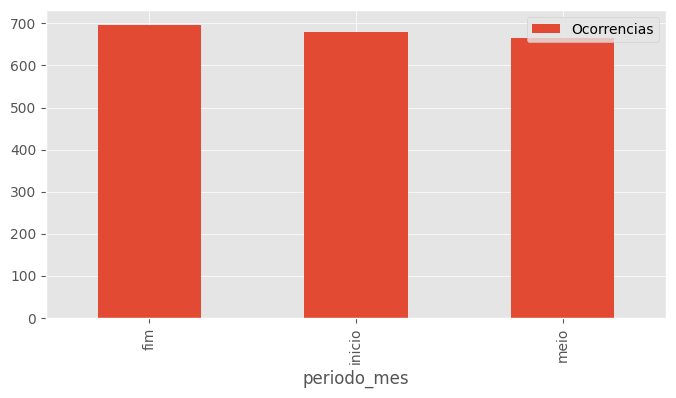

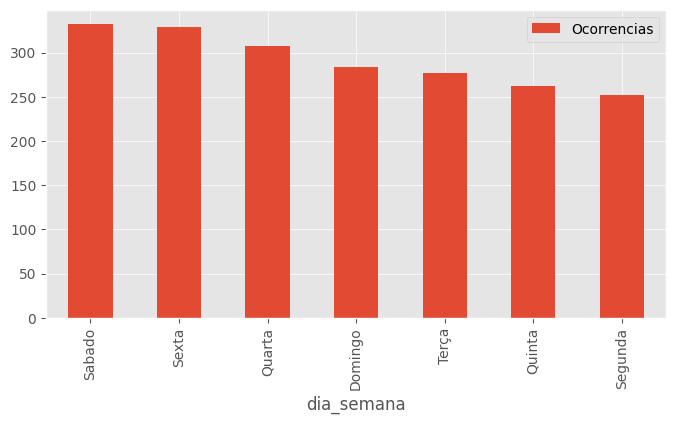

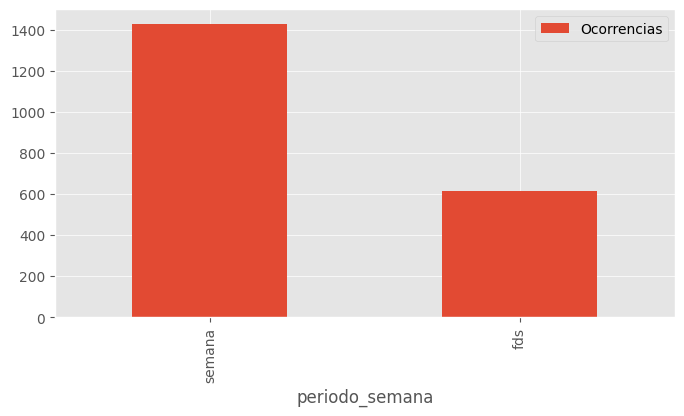

In [119]:
for col in categorical_feature:
    df[col].value_counts().rename('Ocorrencias').to_frame().iloc[0:10,].plot(kind='bar',figsize=(8, 4))
    
plt.close()

In [ ]:
Temp = df.groupby(pd.to_datetime(df.dia_ocorrencia).dt.year)[['dia_ocorrencia']].count().rename(columns={"dia_ocorrencia": "count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Acidentes por ano', loc='Center', fontsize=14)
plt.show()

#### Correlação das variaveis categoricas com a gravidade do acidente

In [99]:
for cat in categorical_feature:

    print("Correlation between " + cat + " and classificacao: " + str(cramers_v(df[cat], df["classificacao"])))

Correlation between codigo_aeronave and classificacao: 0.09333098711700737
Correlation between codigo_operador and classificacao: 0.3151644049025329
Correlation between equipamento and classificacao: 0.15289448008960718
Correlation between fabricante and classificacao: 0.3341789617376144
Correlation between modelo and classificacao: 0.36991282643772894
Correlation between tipo_motor and classificacao: 0.25967994469996963
Correlation between quantidade_motores and classificacao: 0.3163723711842891
Correlation between quantidade_assentos and classificacao: 0.3426234836857863
Correlation between ano_fabricacao and classificacao: 0.10003724990199696
Correlation between pais_registro and classificacao: 0.05672931323441536
Correlation between categoria_aviacao and classificacao: 0.3434450849273768
Correlation between fase_operacao and classificacao: 0.2780879861079444
Correlation between tipo_operacao and classificacao: 0.3464996807661489
Correlation between nivel_dano and classificacao: 0.5

### Numerical features

In [81]:
numerical_features = ['peso_maximo_decolagem', 'quantidade_assentos', 'quantidade_fatalidades', 'quantidade_recomendacoes', 'aeronaves_envolvidas']

<Axes: title={'center': 'Pearson correlation between Variables'}>

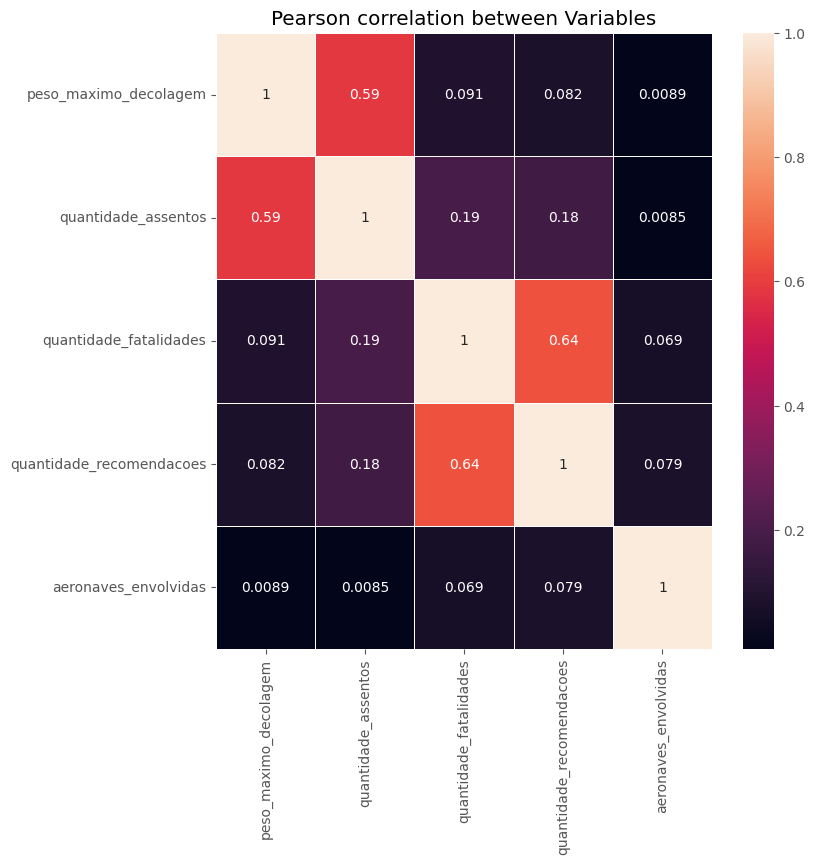

In [83]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Pearson correlation between Variables")
sns.heatmap(df[numerical_features].corr(), annot = True, linewidths=.5, ax=ax)

In [84]:
df[numerical_features].describe()

,peso_maximo_decolagem,quantidade_assentos,quantidade_fatalidades,quantidade_recomendacoes,aeronaves_envolvidas
count,2043.00000,2025.000000,2043.000000,2043.000000,2043.000000
mean,5329.94420,8.928889,0.557513,1.169359,1.018600
std,22004.50988,26.922299,5.696881,3.854059,0.173252
min,0.00000,0.000000,0.000000,0.000000,1.000000
25%,844.00000,2.000000,0.000000,0.000000,1.000000
50%,1633.00000,4.000000,0.000000,0.000000,1.000000
75%,2155.00000,6.000000,0.000000,1.000000,1.000000
max,285990.00000,301.000000,199.000000,83.000000,4.000000


In [85]:
df[numerical_features]

,peso_maximo_decolagem,quantidade_assentos,quantidade_fatalidades,quantidade_recomendacoes,aeronaves_envolvidas
0,660,2.0,0,0,1
1,660,2.0,0,0,1
2,2310,6.0,0,4,1
3,1633,6.0,0,1,1
4,52389,117.0,0,0,1
...,...,...,...,...,...
2038,400,NaN,1,0,1
2039,0,NaN,1,0,1
2040,1746,NaN,0,0,1
2041,3000,NaN,2,0,1


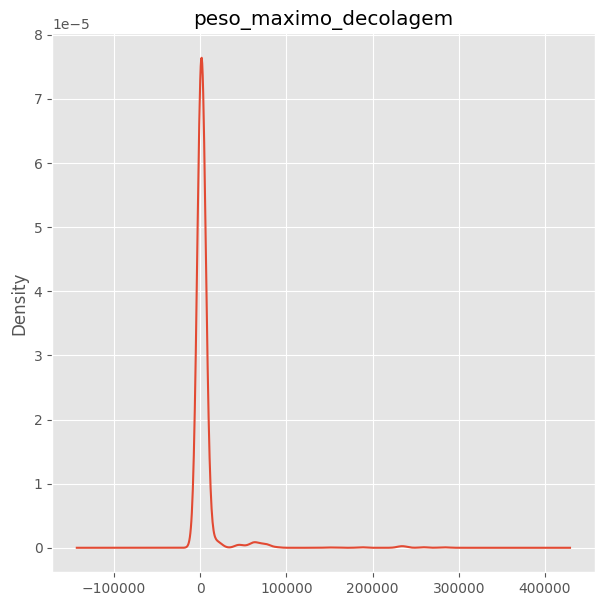

Assimetria: 8.762826909105502


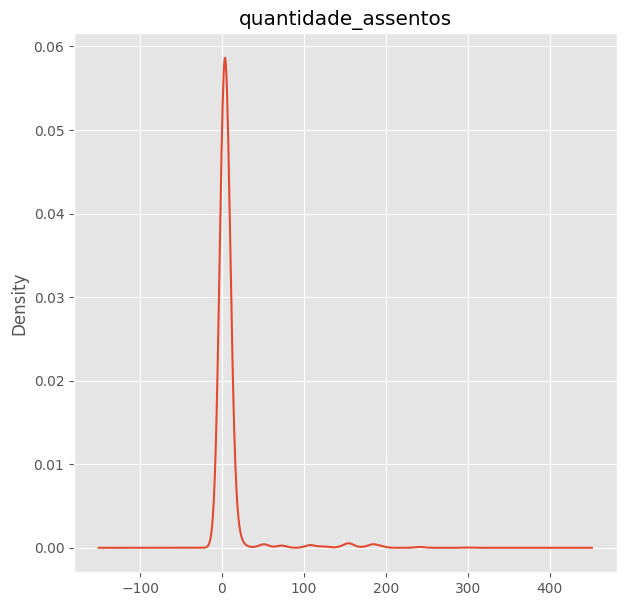

Assimetria: 5.956982870048096


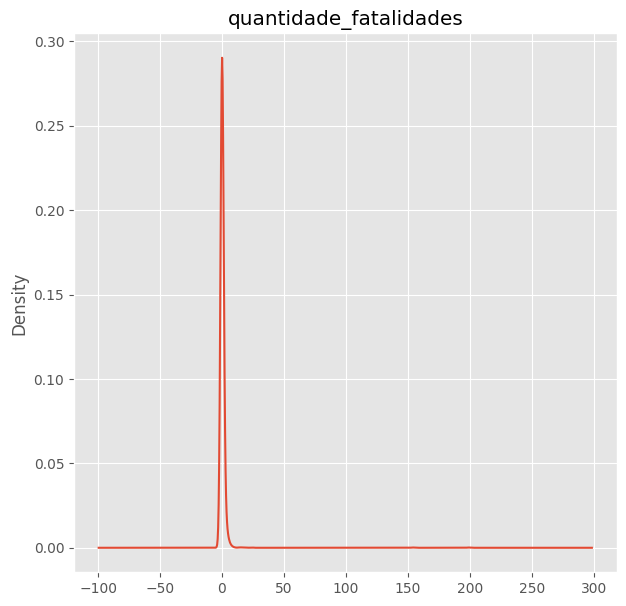

Assimetria: 30.381019889725177


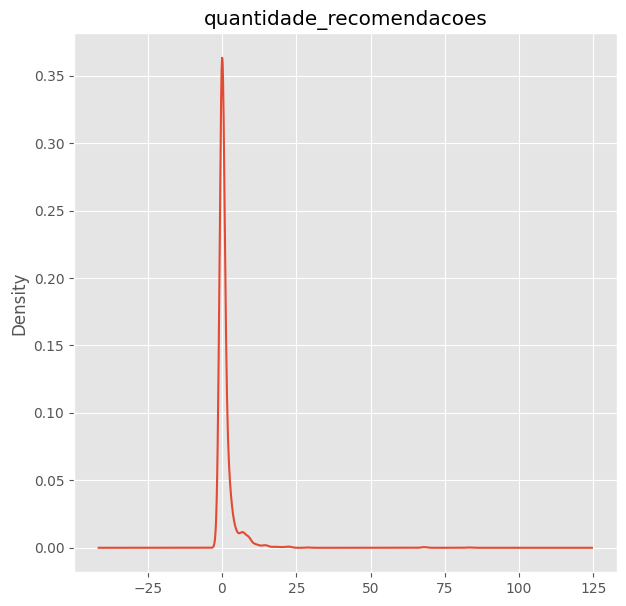

Assimetria: 11.195257422302353


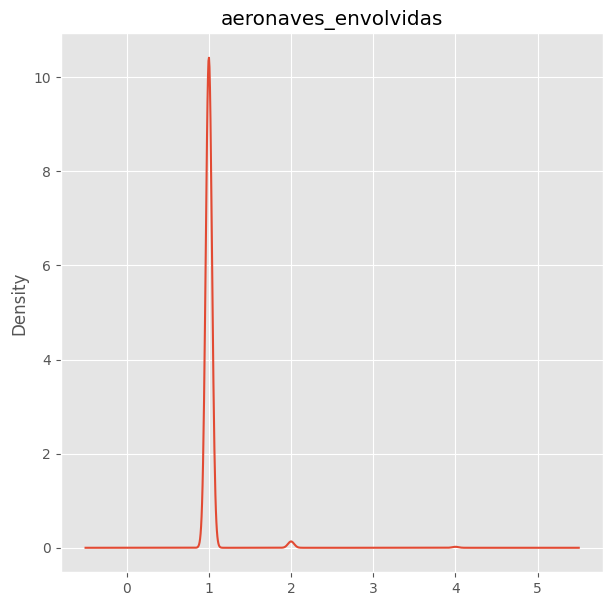

Assimetria: 12.307424252479759


In [86]:
for col in numerical_features:
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_title(col)
    df[col].plot(kind='kde')
    plt.show()
    print("Assimetria: " + str(df[col].skew()))

#### Perfil sem chargeback

In [87]:
df[numerical_features].describe()

,peso_maximo_decolagem,quantidade_assentos,quantidade_fatalidades,quantidade_recomendacoes,aeronaves_envolvidas
count,2043.00000,2025.000000,2043.000000,2043.000000,2043.000000
mean,5329.94420,8.928889,0.557513,1.169359,1.018600
std,22004.50988,26.922299,5.696881,3.854059,0.173252
min,0.00000,0.000000,0.000000,0.000000,1.000000
25%,844.00000,2.000000,0.000000,0.000000,1.000000
50%,1633.00000,4.000000,0.000000,0.000000,1.000000
75%,2155.00000,6.000000,0.000000,1.000000,1.000000
max,285990.00000,301.000000,199.000000,83.000000,4.000000


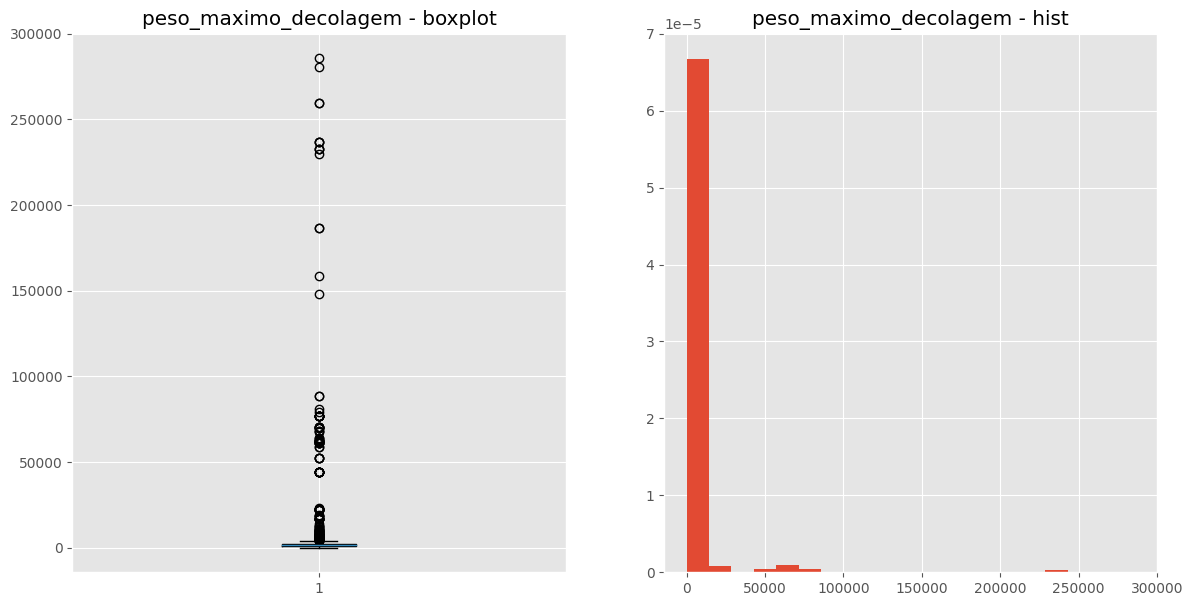

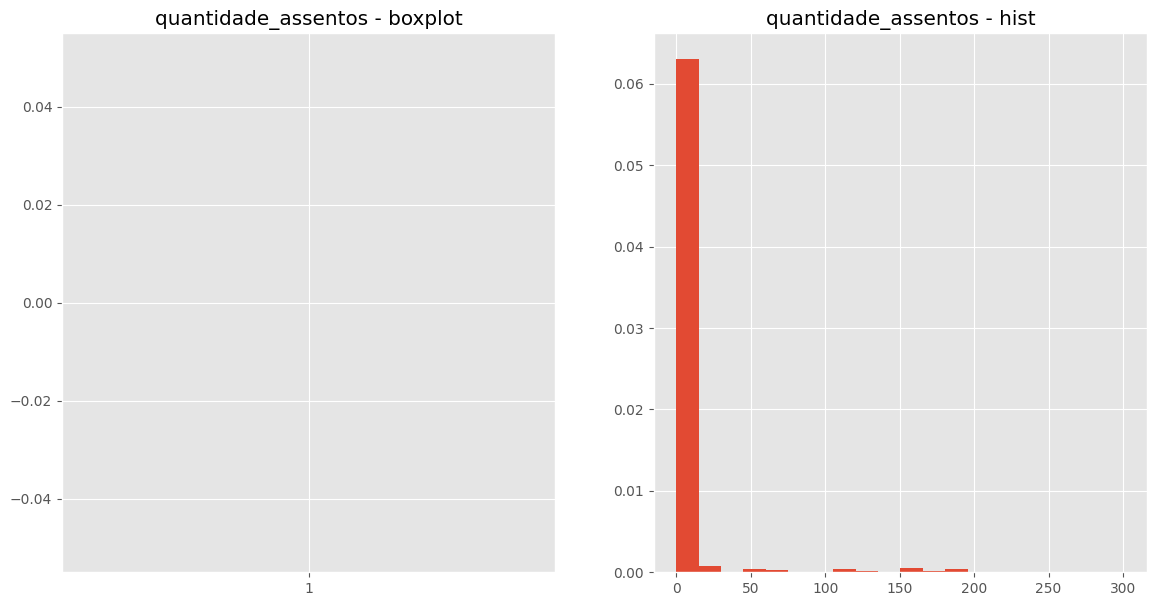

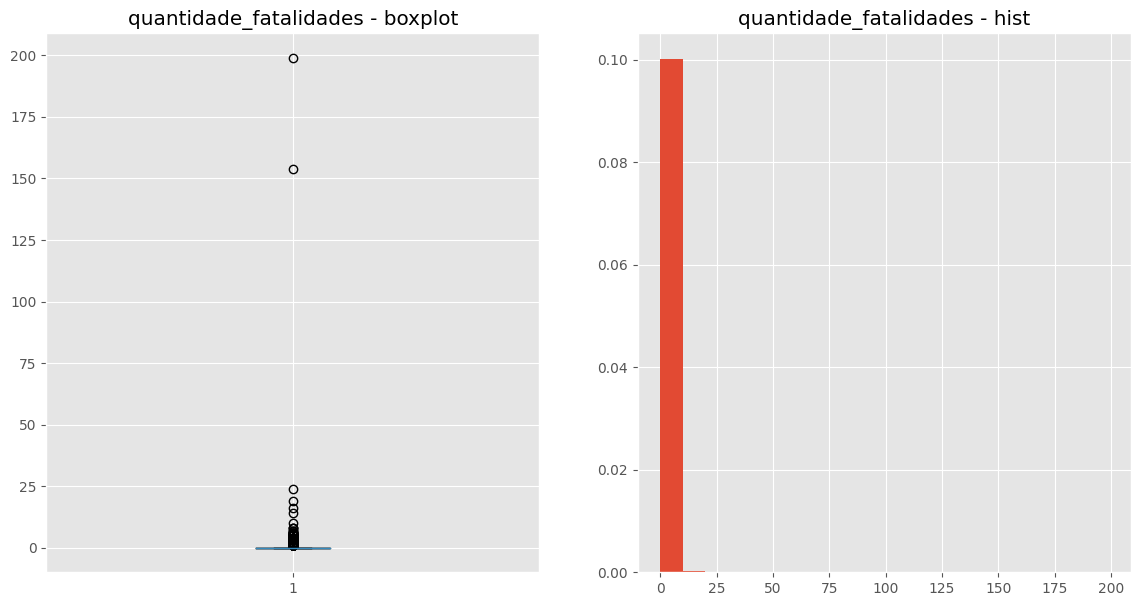

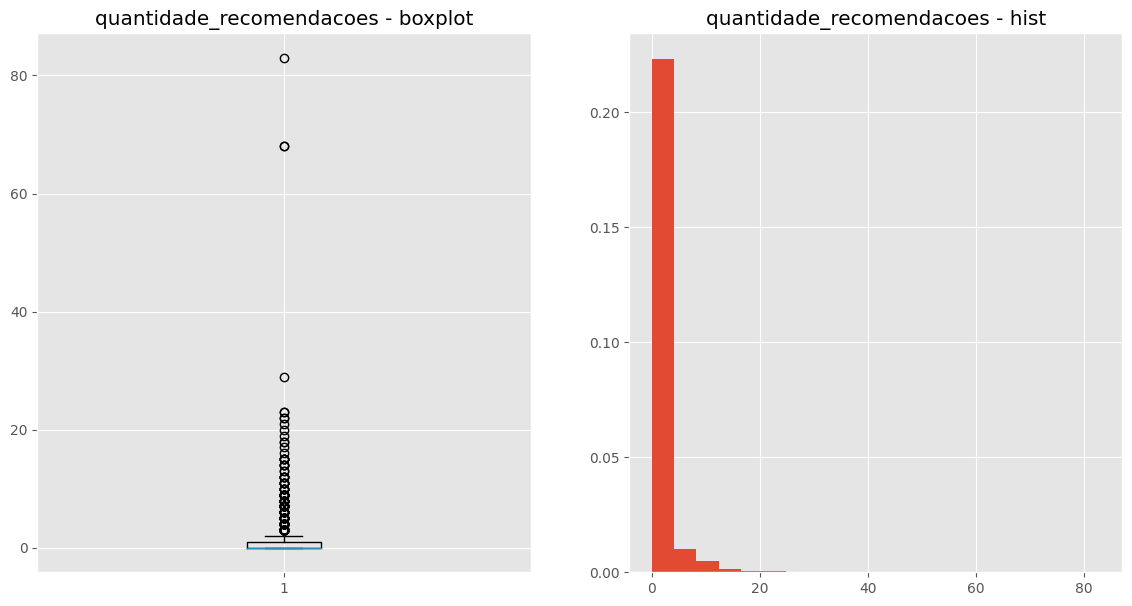

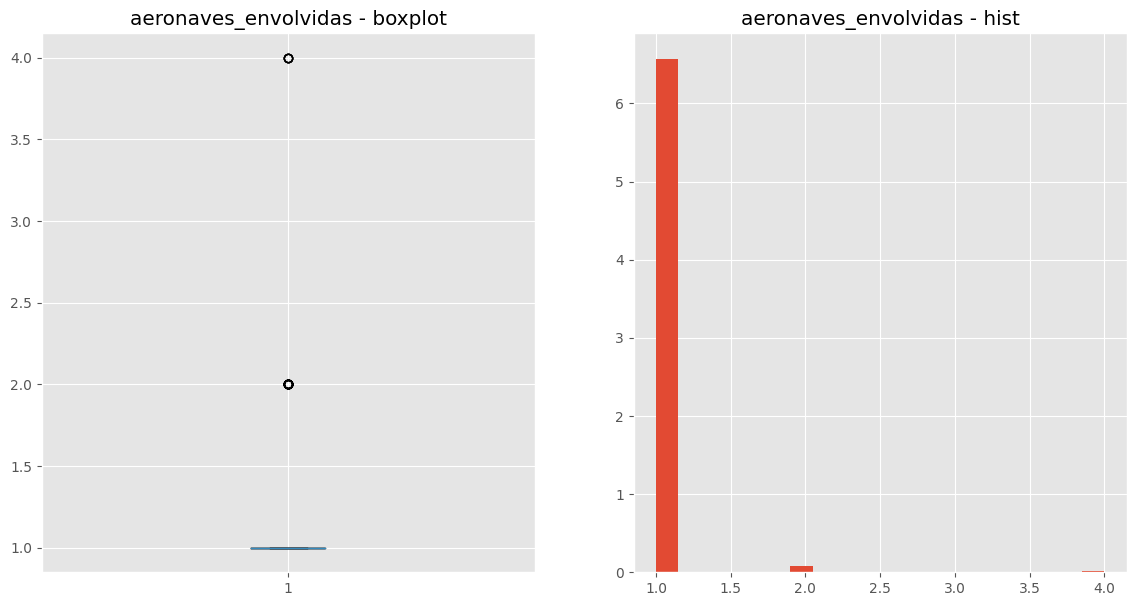

In [98]:
for col in numerical_features:
    fig, ax = plt.subplots(1,2,figsize=(14, 7))
    ax[0].set_title(col + ' - boxplot')
    ax[0].boxplot(df[col].values)
    ax[1].set_title(col + ' - hist')
    ax[1].hist(df[col].values, density=True, bins=20)
    plt.show()

### Analisando cartões que sofreram cbk

In [87]:
df['cartao'].drop_duplicates().count()/len(df)

0.84151217739004

In [88]:
df_nocbk['cartao'].drop_duplicates().count()/len(df_nocbk)

0.8710357382389575

In [89]:
df_cbk['cartao'].drop_duplicates().count()/len(df_cbk)

0.3262786596119929

In [90]:
df_cbk['cartao'].drop_duplicates()

8        554906******0358
11       498406******6424
146      535858******1168
156      544731******8742
157      544731******2235
               ...       
10796    548724******6376
10834    541555******4363
10886    401370******9822
10924    527496******9442
10993    539614******3442
Name: cartao, Length: 185, dtype: object

cartao
0    169
1     16
Name: count, dtype: int64


<Axes: xlabel='cartao'>

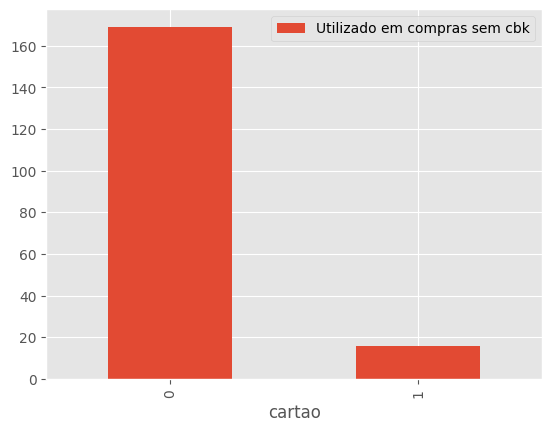

In [91]:
# Cartões unicos utilizados em compras
print(df_cbk['cartao'].drop_duplicates().isin(df_nocbk['cartao']).astype(int).value_counts())
df_cbk['cartao'].drop_duplicates().isin(df_nocbk['cartao']).astype(int).value_counts().rename('Utilizado em compras sem cbk').to_frame().plot(kind='bar' )

### Regras de negocios

#### Bloqueando transações depois de 3 transação usando o mesmo cartão no mês

In [92]:
df

,dia,dia_semana,periodo_semana,periodo_mes,hora,hora_completa_segundos,periodo_dia,cartao,valor,media_dia,media_cartao,total_uso_cartao,cbk,vez_uso_cartao,cartao_usado_antes
0,1,Sexta,semana,inicio,0,114,madrugada,536518******2108,36.54,139.59,36.54,2,Não,1,False
1,1,Sexta,semana,inicio,0,226,madrugada,536518******2108,36.54,139.59,36.54,2,Não,2,True
2,1,Sexta,semana,inicio,0,530,madrugada,453211******1239,69.00,139.59,69.00,1,Não,1,False
3,1,Sexta,semana,inicio,0,1620,madrugada,548827******1705,193.43,139.59,193.43,1,Não,1,False
4,1,Sexta,semana,inicio,1,5566,madrugada,531681******9778,132.00,139.59,132.00,1,Não,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999,30,Sabado,fds,fim,23,83327,noite,439354******5281,15.00,95.18,15.00,1,Não,1,False
11000,30,Sabado,fds,fim,23,83724,noite,549167******1648,20.00,95.18,20.00,1,Não,1,False
11001,30,Sabado,fds,fim,23,83861,noite,518759******8384,70.00,95.18,70.00,1,Não,1,False
11002,30,Sabado,fds,fim,18,66573,tarde,455188******5104,2.10,95.18,2.10,1,Não,1,False


In [93]:
print(df['cbk'].value_counts())
print(df['cbk'].value_counts() / len(df))

cbk
Não    10437
Sim      567
Name: count, dtype: int64
cbk
Não    0.948473
Sim    0.051527
Name: count, dtype: float64


In [94]:
df_filtered = df[df['vez_uso_cartao'] < 4]

In [95]:
df_filtered

,dia,dia_semana,periodo_semana,periodo_mes,hora,hora_completa_segundos,periodo_dia,cartao,valor,media_dia,media_cartao,total_uso_cartao,cbk,vez_uso_cartao,cartao_usado_antes
0,1,Sexta,semana,inicio,0,114,madrugada,536518******2108,36.54,139.59,36.54,2,Não,1,False
1,1,Sexta,semana,inicio,0,226,madrugada,536518******2108,36.54,139.59,36.54,2,Não,2,True
2,1,Sexta,semana,inicio,0,530,madrugada,453211******1239,69.00,139.59,69.00,1,Não,1,False
3,1,Sexta,semana,inicio,0,1620,madrugada,548827******1705,193.43,139.59,193.43,1,Não,1,False
4,1,Sexta,semana,inicio,1,5566,madrugada,531681******9778,132.00,139.59,132.00,1,Não,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999,30,Sabado,fds,fim,23,83327,noite,439354******5281,15.00,95.18,15.00,1,Não,1,False
11000,30,Sabado,fds,fim,23,83724,noite,549167******1648,20.00,95.18,20.00,1,Não,1,False
11001,30,Sabado,fds,fim,23,83861,noite,518759******8384,70.00,95.18,70.00,1,Não,1,False
11002,30,Sabado,fds,fim,18,66573,tarde,455188******5104,2.10,95.18,2.10,1,Não,1,False


In [96]:
df[(df['vez_uso_cartao'] > 3)]

,dia,dia_semana,periodo_semana,periodo_mes,hora,hora_completa_segundos,periodo_dia,cartao,valor,media_dia,media_cartao,total_uso_cartao,cbk,vez_uso_cartao,cartao_usado_antes
14,1,Sexta,semana,inicio,9,33947,manha,498406******6424,126.5,139.59,126.50,8,Sim,4,True
15,1,Sexta,semana,inicio,9,34016,manha,498406******6424,126.5,139.59,126.50,8,Sim,5,True
16,1,Sexta,semana,inicio,9,34107,manha,498406******6424,126.5,139.59,126.50,8,Sim,6,True
17,1,Sexta,semana,inicio,9,34179,manha,498406******6424,126.5,139.59,126.50,8,Sim,7,True
18,1,Sexta,semana,inicio,9,34252,manha,498406******6424,126.5,139.59,126.50,8,Sim,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,30,Sabado,fds,fim,13,46940,tarde,521397******2711,110.0,95.18,122.66,20,Sim,18,True
10843,30,Sabado,fds,fim,13,46999,tarde,521397******2711,110.0,95.18,122.66,20,Sim,19,True
10845,30,Sabado,fds,fim,13,47046,tarde,521397******2711,110.0,95.18,122.66,20,Sim,20,True
10858,30,Sabado,fds,fim,13,48067,tarde,455181******0805,88.0,95.18,51.20,5,Não,5,True


In [97]:
df[(df['vez_uso_cartao'] > 3)]['cbk'].value_counts()

cbk
Sim    189
Não     81
Name: count, dtype: int64

In [98]:
print(df_filtered['cbk'].value_counts())
print(df_filtered['cbk'].value_counts(normalize=True))

cbk
Não    10356
Sim      378
Name: count, dtype: int64
cbk
Não    0.964785
Sim    0.035215
Name: proportion, dtype: float64


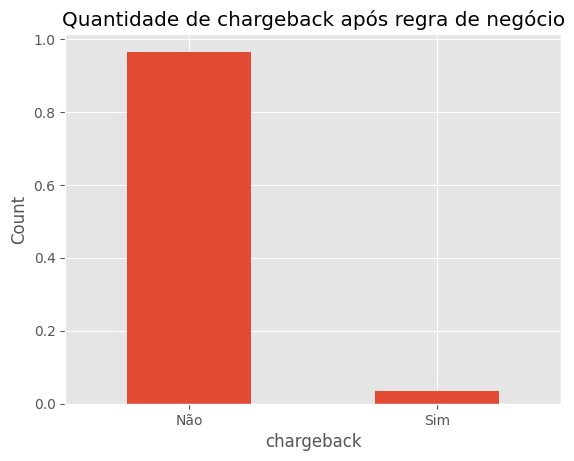

In [99]:
df_filtered['cbk'].value_counts(normalize=True).plot(kind="bar")
plt.title('Quantidade de chargeback após regra de negócio')
plt.xlabel('chargeback')
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [100]:
#total com chargeback filtrando
df[(df['vez_uso_cartao'] > 3) & (df['cbk'] == 'Sim')]['valor'].sum()

30379.05

In [101]:
#total sem chargeback filtrando
df[(df['vez_uso_cartao'] > 3) & (df['cbk'] == 'Não')]['valor'].sum()

7907.719999999999

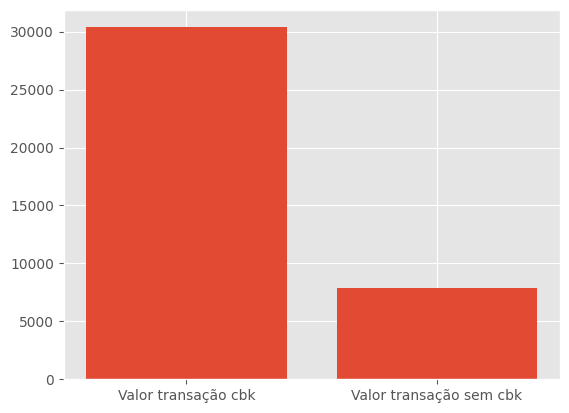

In [102]:
valor = [df[(df['vez_uso_cartao'] > 3) & (df['cbk'] == 'Sim')]['valor'].sum(), df[(df['vez_uso_cartao'] > 3) & (df['cbk'] == 'Não')]['valor'].sum()]
label = ['Valor transação cbk', 'Valor transação sem cbk']
# Figure Size
 
# Horizontal Bar Plot
plt.bar(label, valor)
 
# Show Plot
plt.show()

In [103]:
len(df_filtered)

10734

In [104]:
# Valor não bloqueado com a regra
df_filtered[df_filtered['cbk'] == 'Sim']['valor'].sum()

73219.81

In [105]:
df_filtered[df_filtered['cbk'] == 'Sim']['valor'].count()

378

In [106]:
df_filtered[df_filtered['cbk'] == 'Não']['valor'].sum()

1319011.52

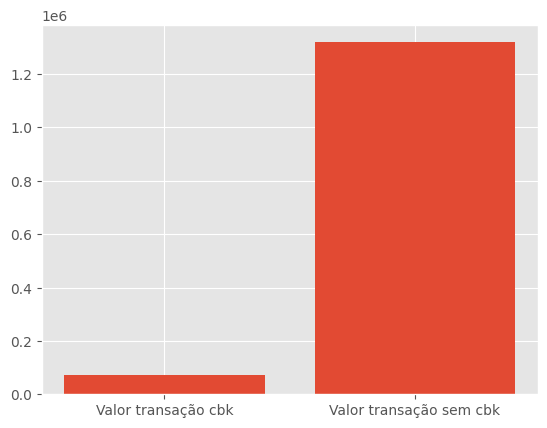

In [107]:
valor = [df_filtered[df_filtered['cbk'] == 'Sim']['valor'].sum(), df_filtered[df_filtered['cbk'] == 'Não']['valor'].sum()]
label = ['Valor transação cbk', 'Valor transação sem cbk']
# Figure Size
 
# Horizontal Bar Plot
plt.bar(label, valor)
 
# Show Plot
plt.show()